**Machine Learning Model to Predict Price of a Vehicle Part at Garage (Interview)**

In [118]:
!pip install sweetviz #Library for Exploratory Visualisation


In [87]:
!pip3 install pycaret #Library for building a machine learning model

Importing Libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
import sweetviz as sv

In [89]:
dataset= pd.read_csv('dataset.csv') #Reading data into Colab

Dataset type and dimension

In [90]:
dataset.shape #The number of columns and rows in the dataset

(507, 5)

In [91]:
dataset.dtypes  #The datatypes (qualitative and quantitative)

Item           object
Brand          object
Price          object
Distributor    object
Date           object
dtype: object

In [92]:
dataset.head() #View of first 5 observations in the dataset

,Item,Brand,Price,Distributor,Date
0,11 plate battery 55a,Univigour,255,NaN,NaN
1,11 plate battery,NaN,220,Willie Porch Ent.,1/18/2022
2,13 plate Battery,Bosch,300,NaN,NaN
3,13 plate Battery,NaN,250,Willie Porch Ent.,1/18/2022
4,13 plate battery 66a,Univigour,295,NaN,NaN


In [93]:
dataset['Price'] = pd.to_numeric(dataset['Price'],errors='coerce') #Change datatype of price from object to float

In [94]:
dataset['Date'] =  pd.to_datetime(dataset['Date'], infer_datetime_format=True) #Change datatype of Date from object to date format

In [95]:
print(dataset.isnull().sum()) #Check for missing values

Item             1
Brand          235
Price           30
Distributor     89
Date            96
dtype: int64


In [96]:
eda_data=sv.analyze(dataset) #Exploring data

                                             |          | [  0%]   00:00 -> (? left)


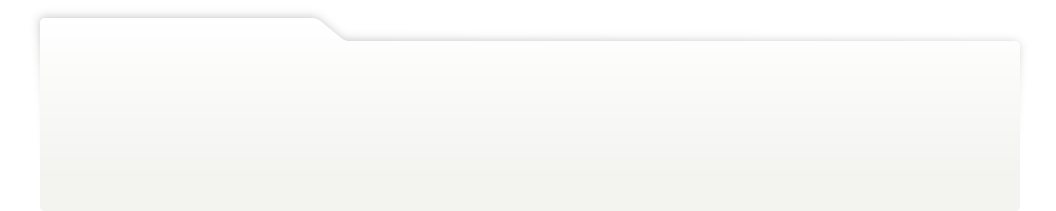
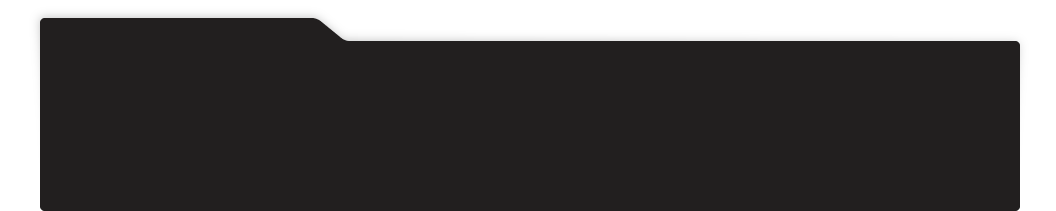
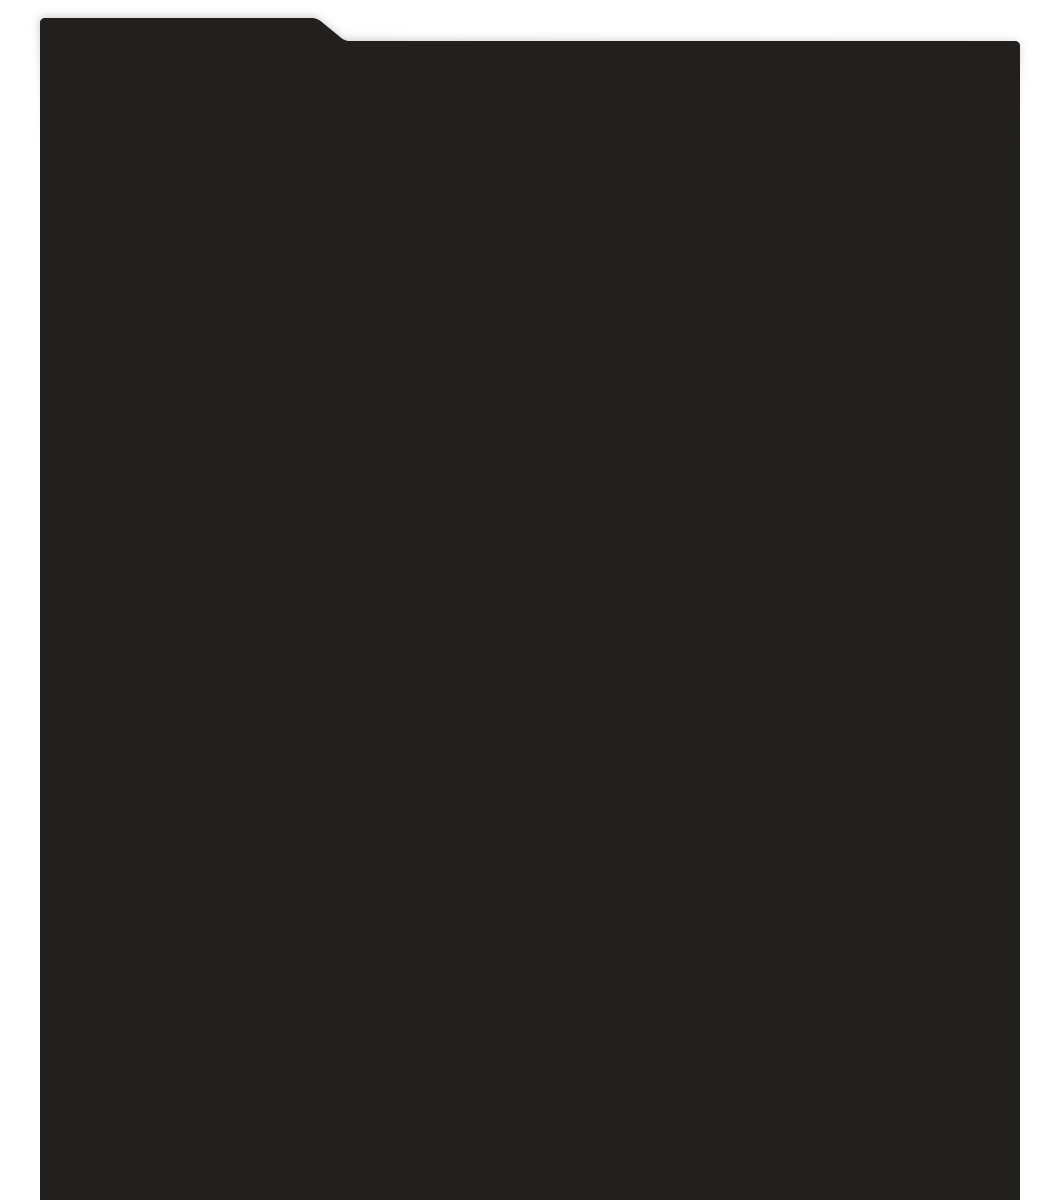
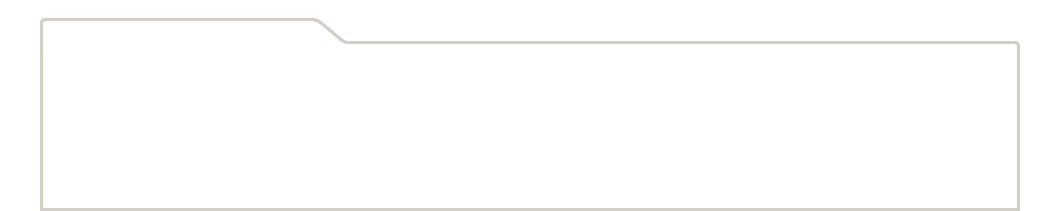
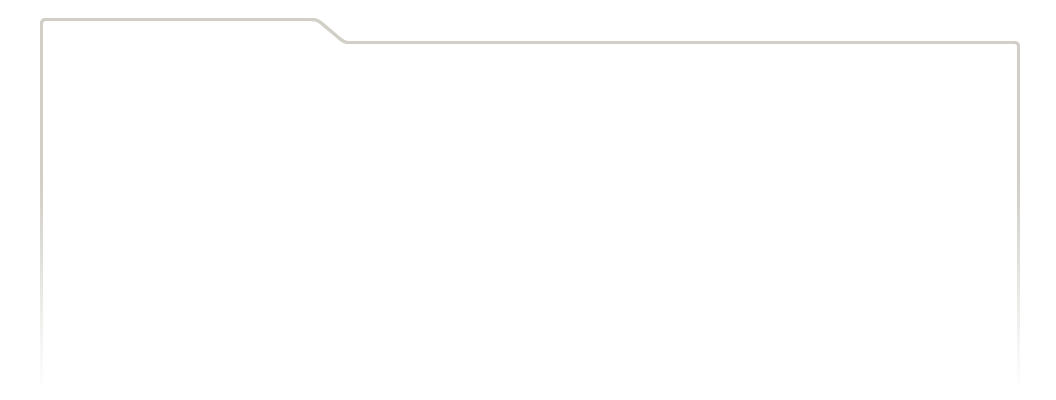
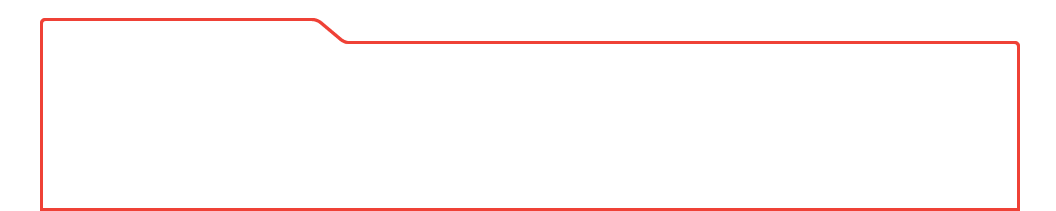
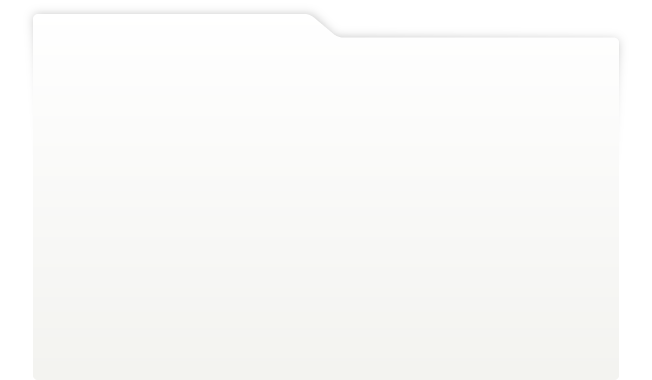
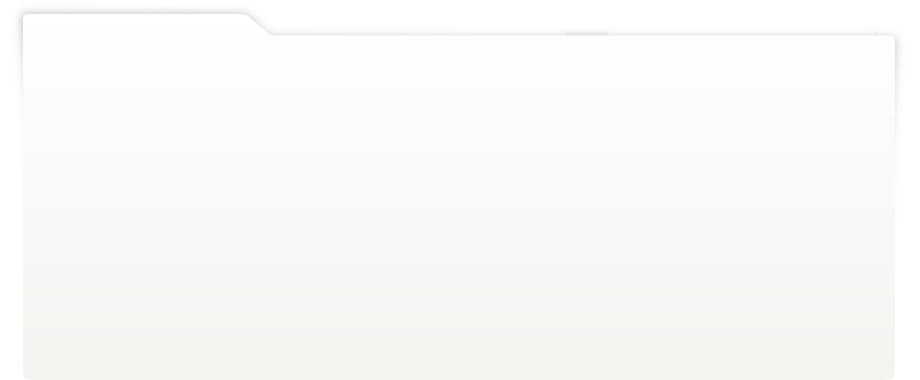
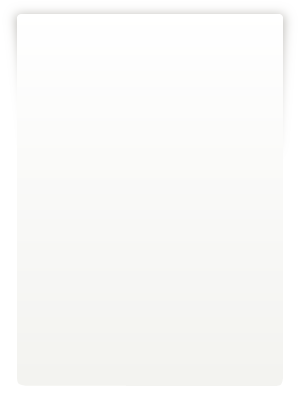
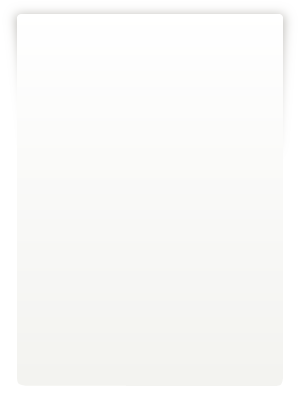
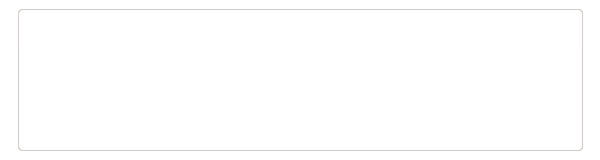
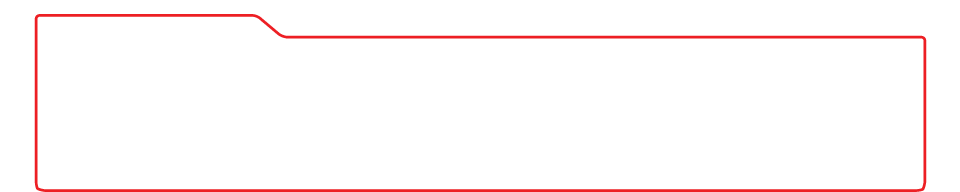
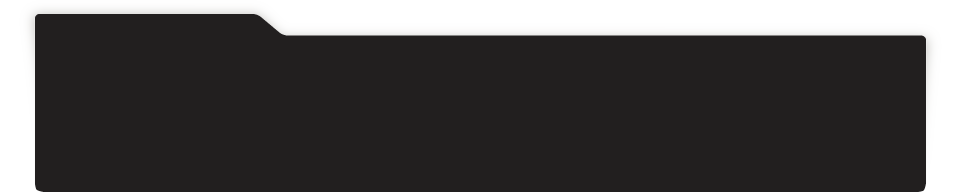
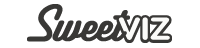
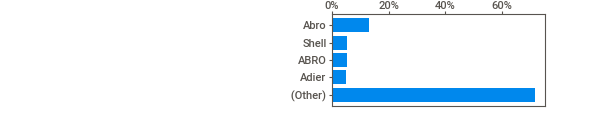
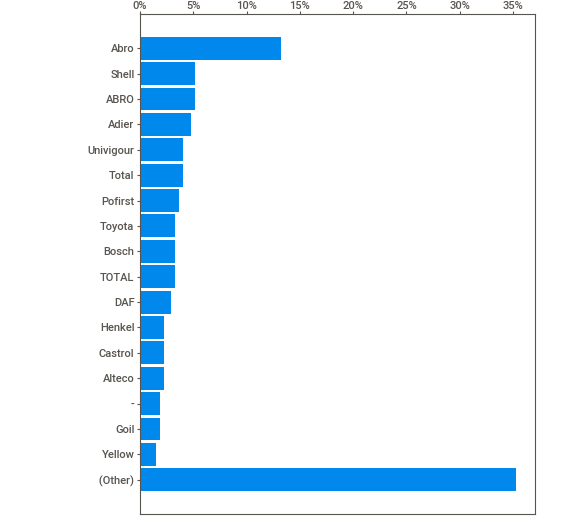
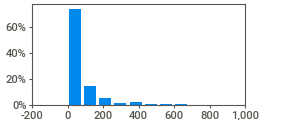
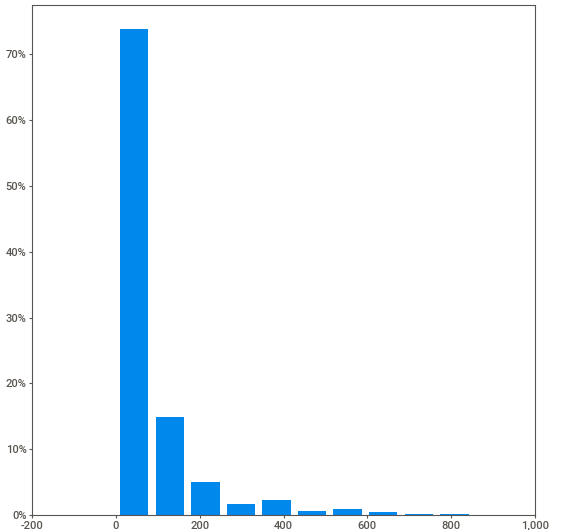
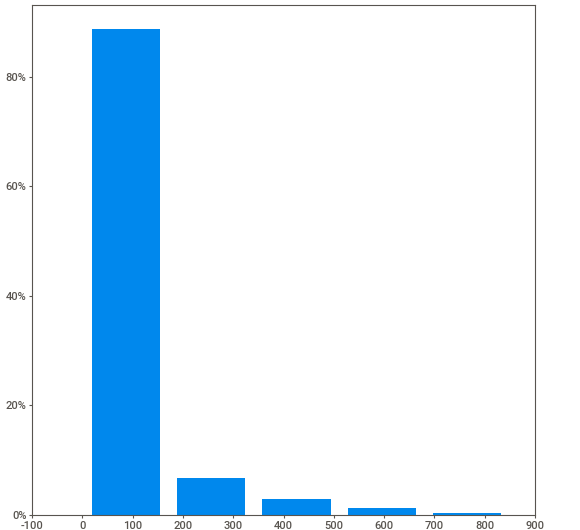
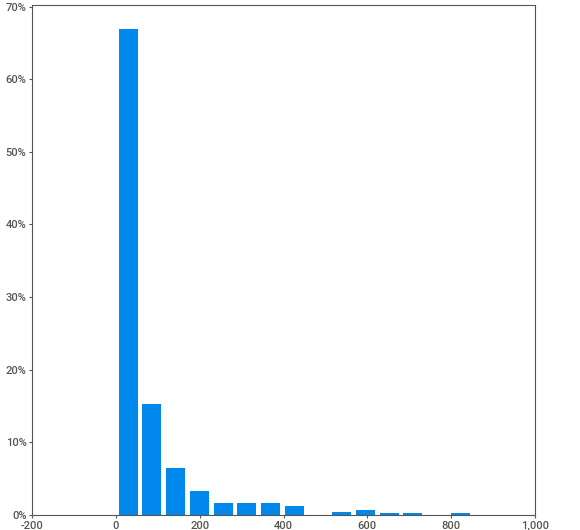
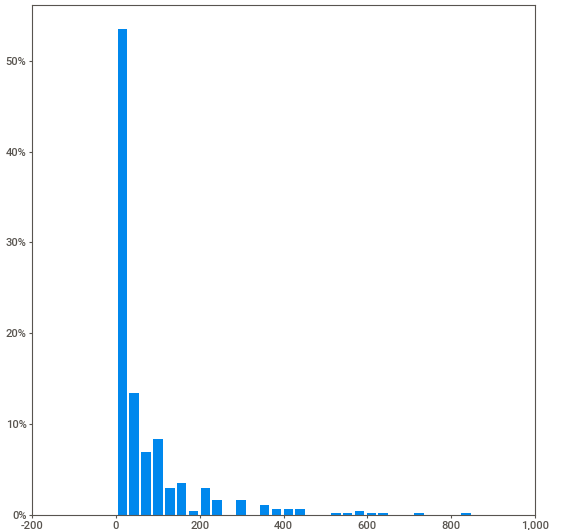
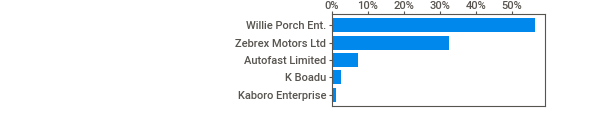
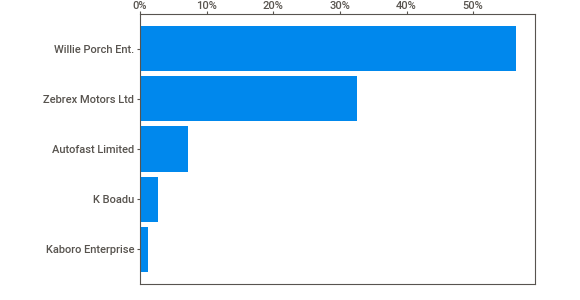
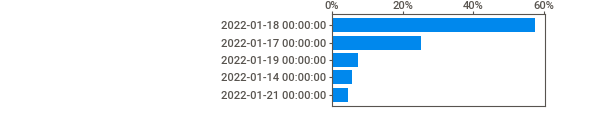
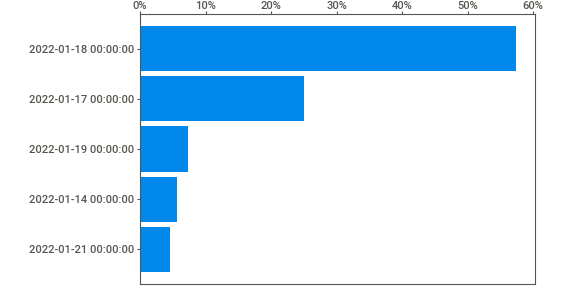
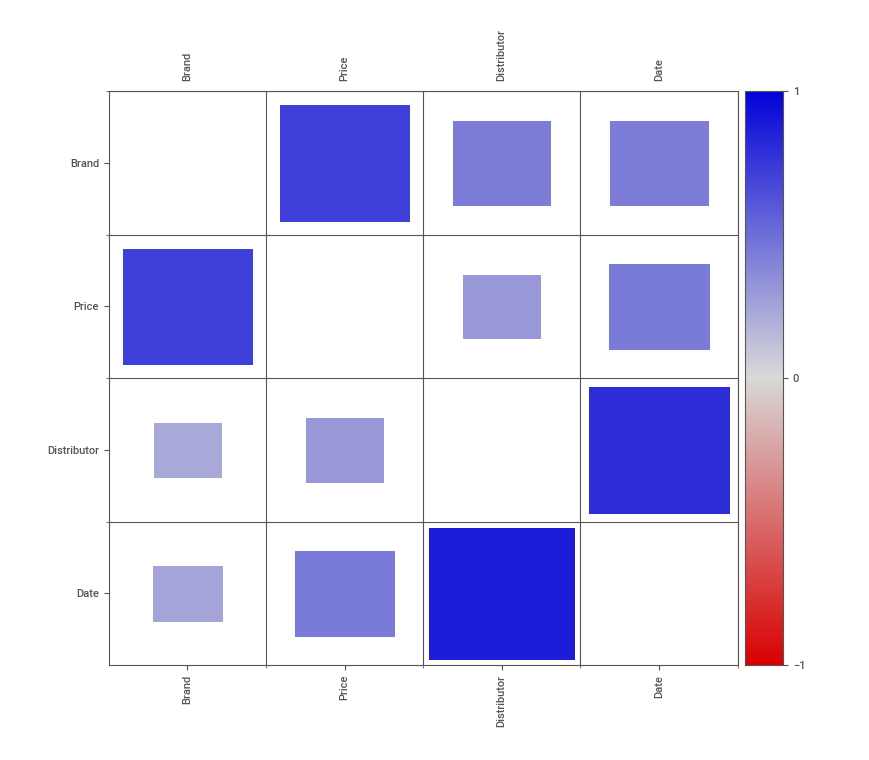
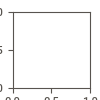

In [97]:
eda_data.show_notebook(layout="vertical",w=900,h=700,scale=0.8)

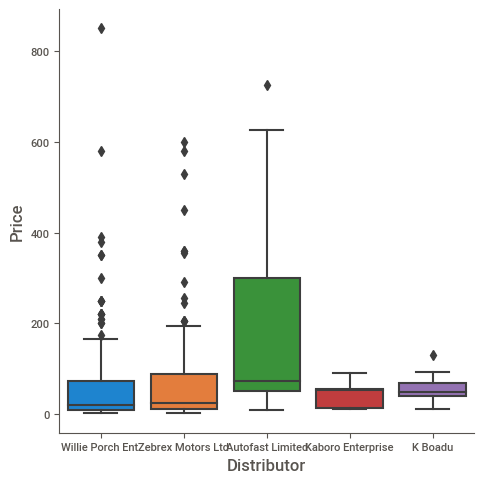

In [98]:
sns.catplot(x="Distributor", y="Price", kind="box", data=dataset) #Plot of Distributor and their Price

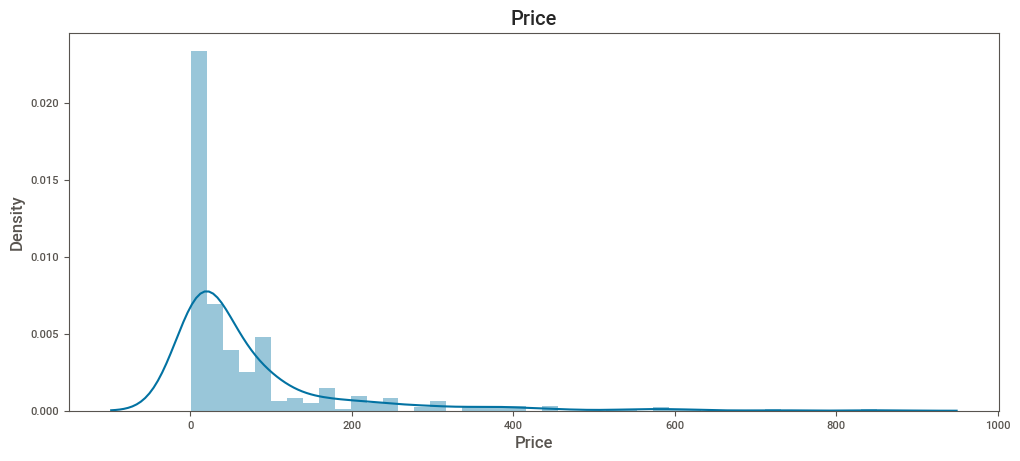

In [99]:
#Kernel density plot on Price
plt.figure(figsize=(12,5))
plt.title("Price")
sns.distplot(dataset['Price'],color='B')

***Machine learning Model***

In [100]:
datasetfor=dataset[['Item','Brand','Price','Distributor']] #Subsetting Dataframe neglecting the Date feature

In [119]:
#Preparing data for training and testing
data = datasetfor.sample(frac=0.95, random_state=786)
data_unseen = datasetfor.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (482, 4)
Unseen Data For Predictions: (25, 4)


In [102]:
model =setup(data = data, target = 'Price',session_id=123) #Setting up the dependent feature

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(482, 4)"
3,Missing Values,True
4,Numeric Features,0
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(315, 338)"


In [120]:
best_model = compare_models() #Comparing set of models built

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,53.8224,8.925443e+03,86.4025,1.968000e-01,1.2414,2.5734,0.024
gbr,Gradient Boosting Regressor,51.3987,9.198085e+03,87.8919,1.796000e-01,1.1664,2.0407,0.153
ridge,Ridge Regression,54.3041,8.904845e+03,86.9332,1.759000e-01,1.2420,2.5928,0.027
huber,Huber Regressor,52.4367,9.027013e+03,87.5458,1.643000e-01,1.1810,2.2401,0.123
par,Passive Aggressive Regressor,53.0269,8.983042e+03,87.0544,1.625000e-01,1.1981,2.3299,0.139
omp,Orthogonal Matching Pursuit,49.6275,9.489981e+03,89.2129,1.422000e-01,1.1168,1.5164,0.027
llar,Lasso Least Angle Regression,56.9736,9.556112e+03,90.7052,1.371000e-01,1.3022,2.8836,0.333
knn,K Neighbors Regressor,52.1365,9.445891e+03,90.2152,8.020000e-02,1.2696,2.0488,0.074
rf,Random Forest Regressor,46.0249,9.992264e+03,91.8618,6.800000e-02,1.1370,0.7049,1.118
br,Bayesian Ridge,56.3897,9.344857e+03,89.8841,3.830000e-02,1.3273,2.5325,0.285


In [104]:
print(best_model) #Output of the best performing model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


In [121]:
models() #The set models and names to call from

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [123]:
lasso = create_model('lasso') # The metric measure of the performing model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80.1617,19783.6035,140.6542,-0.2870,1.1988,1.4639
1,41.3677,2409.4570,49.0862,-0.3022,1.3278,3.0993
2,56.3931,7460.3745,86.3735,0.4632,1.1758,2.1520
3,55.6283,5467.9253,73.9454,0.6775,1.3780,3.3789
4,51.8454,8169.4810,90.3852,0.5738,1.2912,3.8013
5,42.2338,2445.7615,49.4546,0.6114,1.2233,2.6394
6,43.5000,3564.6526,59.7047,0.0236,1.0572,1.7020
7,62.5676,22520.6113,150.0687,0.1046,1.3174,2.7135
8,33.9310,1433.9025,37.8669,0.0486,1.1157,2.2963
9,70.5955,15998.6611,126.4858,0.0550,1.3284,2.4872


In [124]:
tuned_lasso = tune_model(lasso) ## The metric measure of the tuned performing model

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,79.9469,18851.6211,137.3012,-0.2264,1.9277,1.4814
1,39.1305,2286.8916,47.8215,-0.2359,1.4042,2.7957
2,62.6180,10001.5781,100.0079,0.2804,1.4849,2.3900
3,59.9383,8329.6641,91.2670,0.5087,1.3455,3.1230
4,59.6973,11774.2637,108.5093,0.3857,1.7522,3.1869
5,42.6627,2698.4680,51.9468,0.5712,1.1694,2.4658
6,46.0556,3981.0654,63.0957,-0.0905,1.3183,1.7052
7,65.7339,23447.2090,153.1248,0.0677,1.3870,2.6494
8,33.4816,1482.9758,38.5094,0.0161,1.0511,1.8871
9,69.1173,17134.7344,130.8997,-0.0121,1.5397,2.2045


In [125]:
evaluate_model(tuned_lasso) #Model Full evaluation

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [145]:
final_lasso = finalize_model(tuned_lasso) #Finilizing model

In [146]:
print(final_lasso) #Printing model to observe final parameters

Lasso(alpha=2.81, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)


In [142]:
data_unseen1=data_unseen[['Item','Brand','Distributor']] #Subsetting Dataset to include independent features

In [148]:
unseen_predictions = predict_model(final_lasso, data=data_unseen1) #Predicting the Price of three Items
unseen_predictions.head(3)

,Item,Brand,Distributor,Label
0,13 plate Battery small terminals,Bosch,NaN,137.171005
1,ATF type TI-V copy,Toyota,Willie Porch Ent.,63.420540
2,Electrodes,Golden moon,NaN,31.667505


In [149]:
save_model(final_lasso,'Final LASSO Model') #Saving the final model

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('fix_perfect', Remove_100(target='Price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
              